### **Project 2**

#### **Seoul Bike Trip Duration Prediction**

##### **Company :** The Machine Learning Company

##### **Role :** Machine Learning Intern

##### **Author :** Anuganti Suresh

#### **Problem Statement**

- **Seoul Bike Trip Duration Prediction**

#### **Dataset Information:**

- **Number of Rows :** 9601139

- **Number of Columns :** 26

|Abbreviation   |Parameters/Features    |Type   |Measurement |                  
|---------------|-----------------------|-------------|---------------|
|Duration       |trip duration          |Continuous    |1, 2, 3, … 5940    |
|Distance       |trip distance          |Continuous    |1, 2, 3, … 33,290  |
|PD time        |pickup date and time   |year-month-day|
|               |                       |hour:minute:second|Time|
|DDtime         |dropoff date and time  |year-month-day|
|               |                       |hour:minute:second|Time|
|PLong          |pickup longitude		    |continuous   |Radians  |
|PLatd          |pickup latitude		    |continuous	  |Radians  |
|DLong          |dropoff longitude		  |continuous	  |Radians  |
|DLatd          |dropoff latitude		    |continuous	  |Radians  |
|Haversine      |haversine distance		  |continuous	  |Kilometres|
|Pmonth         |pickup month		        |categorical	|January, February, March, … December|
|Pday           |pickup day		          |categorical	|1,2,3, … 31|
|Phour          |pickup hour		        |categorical	|0,1,2, … 23|
|Pmin           |pickup minute		      |continuous	  |1,2,3, … 60|
|PDweek         |pickup day of the week	|categorical	|Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday|
|Dmonth         |dropoff month		      |categorical	|January, February, March,… December|
|Dday           |dropoff day		        |categorical	|1,2,3, … 31|
|Dhour          |dropoff hour		        |categorical	|0,1,2, … 23|
|Dmin           |dropoff minute		      |continuous	  |1,2,3, … 60|
|DDweek         |dropoff day of the week|categorical	|Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday|
|Temp           |temperature		        |continuous	  |°C|
|Precip         |precipitation		      |continuous	  |Mm|
|Wind           |windspeed		          |continuous	  |m/s|
|Humd           |humidity		            |continuous	  |%|
|Solar          |solar radiation		    |continuous	  |MJ/m2|
|Snow           |snow fall		          |continuous	  |cm|
|GroundTemp     |ground temperature		  |continuous	  |°C|
|Dust           |1 hour average fine dust concentration		|continuous	|㎍/㎥|

### Table of Contents

* [1) Import Libraries](#1)

* [2) Import Data And Preprocessing](#2)

* [3) Exploratory Data Analysis](#3)

 * [3.1) Visualizations](#3.1)

   * [3.1.1 Univariate Analysis](#3.1.1)
   * [3.1.2 Bivariate Analysis](#3.1.2)
   * [3.1.3 Multivariate Analysis](#3.1.3)

 * [3.2) Relation between Features](#3.2)

   * [3.2.1 The correlation between the continuos variables](#3.2.1)
   * [3.2.2) The correlation between this continuos features and the target](#3.2.1)

 * [3.3) Skewness and Kurtosis](#3.3)

 * [4) Feature Engineering](#4)

   * [4.1) Missing Values](#4.1)
   * [4.2) Outliers](#4.2)
   * [4.3) Label Encoding](#4.3)
   * [4.4) Scaling](#4.4)

* [5) Modelling](#5)

* [6) Model Evaluation](#6)

* [7) Hyperparameter Tuning](#7)

* [8) Prediction](#8)

#### **1) Import Libraries**

In [1]:
# Read Data
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor, plot_importance

#### **2) Import Data And Preprocessing**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
Bike = pd.read_csv("C:/Users/deepusuresh/Desktop/New folder/Seoul-Bike-Trip-Duration.zip")

In [5]:
display(Bike.head(3))
display(Bike.tail(3))

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
9601136,9830308,118,2730,37.506199,127.003944,37.514870,127.015282,1.389156,12,31,...,58,1,-5.4,0.0,1.3,46.0,0.0,0.0,-5.0,49.0
9601137,9830309,90,17170,37.489750,126.927467,37.565903,126.901184,8.779307,12,31,...,26,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601138,9830310,116,1410,37.585655,127.075050,37.585655,127.075050,0.000000,12,31,...,30,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0


In [ ]:
Bike.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df = Bike.drop(['PLatd', 'DLatd', 'Pday', 'Pmin', 'Dday', 'Dmin', 'Precip', 'Snow', 'Dust'], axis=1)
df.head()

,Duration,Distance,PLong,DLong,Haversine,Pmonth,Phour,PDweek,Dmonth,Dhour,DDweek,Temp,Wind,Humid,Solar,GroundTemp
0,3,50,37.544666,37.544666,0.000000,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2
1,24,7670,37.506199,37.551250,5.713529,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2
2,8,1390,37.544590,37.537014,0.913702,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2
3,8,1820,37.571102,37.561447,1.468027,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2
4,4,850,37.573242,37.565849,0.823227,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2


In [7]:
Bike.shape

(9601139, 25)

In [8]:
Bike_original = Bike.copy()

In [ ]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(13), int64(12)
memory usage: 1.8 GB


In [ ]:
Bike.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,2.914948e+01,2.943812e+00,7.579198e+00,1.576666e+01,1.442620e+01,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,1.725837e+01,1.976063e+00,2.696781e+00,8.747788e+00,6.484493e+00,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,2.000000e+01,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


#### **3) Exploratory Data Analysis**

In [ ]:
Bike.duplicated().value_counts()

False    9577233
True       23906
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    9564712
True       36427
dtype: int64

In [ ]:
# Remove all duplicates
Bike.drop_duplicates(inplace=True)
print("Dataset size before removing duplicates:", Bike_original.shape)
print("Dataset size after removing duplicates:", Bike.shape)

Dataset size before removing duplicates: (9601139, 25)
Dataset size after removing duplicates: (9577233, 25)


In [ ]:
# Remove all duplicates
df.drop_duplicates(inplace=True)
print("Dataset size before removing duplicates:", Bike_original.shape)
print("Dataset size after removing duplicates:", df.shape)

Dataset size before removing duplicates: (9601139, 25)
Dataset size after removing duplicates: (9564712, 16)


In [ ]:
df.head()

,Duration,Distance,PLong,DLong,Haversine,Pmonth,Phour,PDweek,Dmonth,Dhour,DDweek,Temp,Wind,Humid,Solar,GroundTemp
0,3,50,37.544666,37.544666,0.000000,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2
1,24,7670,37.506199,37.551250,5.713529,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2
2,8,1390,37.544590,37.537014,0.913702,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2
3,8,1820,37.571102,37.561447,1.468027,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2
4,4,850,37.573242,37.565849,0.823227,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2


- Create some **additional features** from the **date/time** variable to make the machine learning algorithms work more efficiently. This process of creating additional features from the existing data by using domain knowledge is known as feature engineering.

- From the **Pickup date and time** variable, variables such as
 - pickup month, day, hour, minute and day of the week are computed.
 
- From **Dropoff date and time** variable, variables such as
 - dropoff month, day, hour, minute and day of the week are extracted.
 
- Although the trip distance is already present in the data, the distance between pickup station and drop off station is computed using haversine function, by using pickup latitude and longitude details and drop off latitude and longitude details.

### **6) Modelling** 

In [ ]:
df = df.iloc[0:900000, 0:16]

In [ ]:
df.head()

,Duration,Distance,PLong,DLong,Haversine,Pmonth,Phour,PDweek,Dmonth,Dhour,DDweek,Temp,Wind,Humid,Solar,GroundTemp
0,3,50,37.544666,37.544666,0.000000,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2
1,24,7670,37.506199,37.551250,5.713529,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2
2,8,1390,37.544590,37.537014,0.913702,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2
3,8,1820,37.571102,37.561447,1.468027,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2
4,4,850,37.573242,37.565849,0.823227,1,0,0,1,0,0,-3.2,0.5,40.0,0.0,-2.2


In [ ]:
X = df.drop('Duration', axis=1)
y = df['Duration']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### **7) Model Evaluation**

##### **7.1) Random Forest**

In [ ]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_rfc = rfc.predict(X_test)

In [ ]:
print("Random Forest : Train Score {:.2f} & Test Score {:.2f}".format(rfc.score(X_train, y_train), rfc.score(X_test, y_test)))

Random Forest : Train Score 0.96 & Test Score 0.75


No handles with labels found to put in legend.


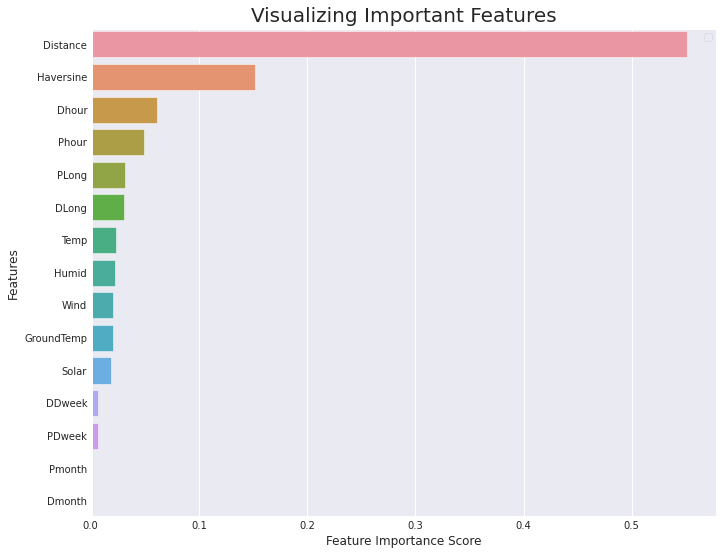

In [ ]:
plt.figure(figsize=(10,9))
feature_imp = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", size=20)
plt.legend()
plt.show()

##### **7.1) XGBoost**

In [ ]:
xgb1 = XGBRegressor()
xgb1.fit(X_train, y_train)

[05:59:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# make predictions for test set
y_pred_xgb1 = xgb1.predict(X_test)
predictions = [round(value) for value in y_pred_xgb1]

In [ ]:
print("XGBoost : Train Score {:.2f} & Test Score {:.2f}".format(xgb1.score(X_train, y_train), xgb1.score(X_test, y_test)))

XGBoost : Train Score 0.72 & Test Score 0.71


##### **7.3) LGBM**

In [ ]:
LGB = LGBMRegressor()
LGB.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred_LGB = LGB.predict(X_test)

In [ ]:
print("XGBoost : Train Score {:.2f} & Test Score {:.2f}".format(LGB.score(X_train, y_train), LGB.score(X_test, y_test)))

XGBoost : Train Score 0.80 & Test Score 0.79


In [ ]:
mae_lgb = mean_absolute_error(y_test, y_pred_LGB)
print("MAE: ", mae_lgb)

MAE:  5.3740704599458455


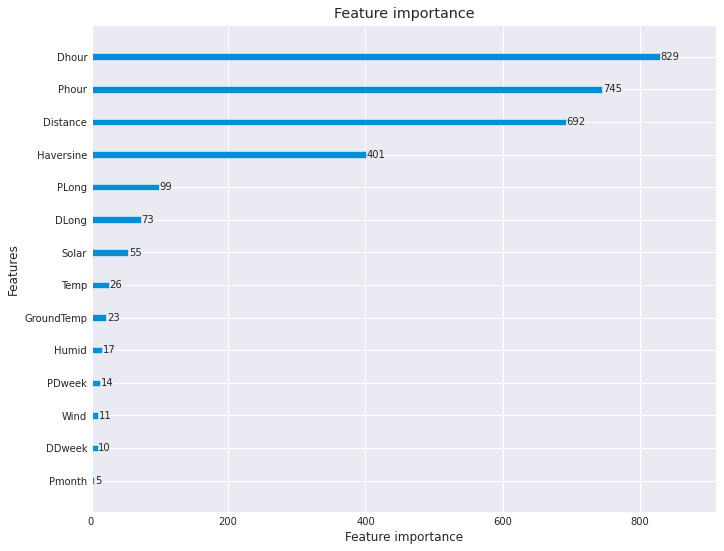

In [ ]:
plot_importance(LGB, figsize=(10, 9));

##### **7.4) KNN**

In [ ]:
for i in range(3,15,3):
    
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    y_pred_KNN = KNN.predict(X_test)

    # accuracy
    KNN_acc = accuracy_score(y_test, y_pred_KNN)

    print("kneighbors {}".format(i))
    print("\nKNeighborsClassifier : Train Score {:.2f} & Test Score {:.2f}".format(KNN.score(X_train, y_train), KNN.score(X_test, y_test)))
    print('-'*70)
    print("\n\nConfusion matrix: \n\n",confusion_matrix(y_test, y_pred_KNN))
    print('-'*70)
    print("\n\nClassification Report: \n\n", classification_report(y_pred_KNN, y_test, labels=None))
    print('-'*70)
    print("\n\ncohen kappa score: \n\n", cohen_kappa_score(y_test, y_pred_KNN))
    print('*'*70)
    print("\n\n")

kneighbors 3

KNeighborsClassifier : Train Score 0.42 & Test Score 0.13
----------------------------------------------------------------------


NameError: ignored